# CODE TO CLASSIFY TRAFFIC SIGNS USING LE-NET ARCHITECTURE IN KERAS

# STEP-0: PROBLEM STATEMENT

- In this case study, you have been provided with images of traffic signs and the goal is to train a Deep Network to classify them
- The dataset contains 43 different classes of images. 
- Classes are as listed below: 

    - ( 0, b'Speed limit (20km/h)') ( 1, b'Speed limit (30km/h)')
    - ( 2, b'Speed limit (50km/h)') ( 3, b'Speed limit (60km/h)')
    - ( 4, b'Speed limit (70km/h)') ( 5, b'Speed limit (80km/h)')
    - ( 6, b'End of speed limit (80km/h)') ( 7, b'Speed limit (100km/h)')
    - ( 8, b'Speed limit (120km/h)') ( 9, b'No passing')
    - (10, b'No passing for vehicles over 3.5 metric tons')
    - (11, b'Right-of-way at the next intersection') (12, b'Priority road')
    - (13, b'Yield') (14, b'Stop') (15, b'No vehicles')
    - (16, b'Vehicles over 3.5 metric tons prohibited') (17, b'No entry')
    - (18, b'General caution') (19, b'Dangerous curve to the left')
    - (20, b'Dangerous curve to the right') (21, b'Double curve')
    - (22, b'Bumpy road') (23, b'Slippery road')
    - (24, b'Road narrows on the right') (25, b'Road work')
    - (26, b'Traffic signals') (27, b'Pedestrians') (28, b'Children crossing')
    - (29, b'Bicycles crossing') (30, b'Beware of ice/snow')
    - (31, b'Wild animals crossing')
    - (32, b'End of all speed and passing limits') (33, b'Turn right ahead')
    - (34, b'Turn left ahead') (35, b'Ahead only') (36, b'Go straight or right')
    - (37, b'Go straight or left') (38, b'Keep right') (39, b'Keep left')
    - (40, b'Roundabout mandatory') (41, b'End of no passing')
    - (42, b'End of no passing by vehicles over 3.5 metric tons')

# STEP-1: IMPORT LIBRARIES AND DATASET

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import numpy as np  # Import Numpy for data statistical analysis 
import pandas as pd # Import Pandas for data manipulation using dataframes
import matplotlib.pyplot as plt # Import matplotlib for data visualisation
import seaborn as sns
import pickle  
import random

In [5]:
# The pickle module implements binary protocols for serializing and de-serializing a Python object structure.
with open("./traffic-signs-data/train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open("./traffic-signs-data/valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("./traffic-signs-data/test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [6]:
X_train,y_train = train['features'],train['labels']
X_validation,y_validation =  valid['features'],valid['labels']
X_test,y_test =  test['features'],test['labels']

In [7]:
X_train.shape

(34799, 32, 32, 3)

In [8]:
y_train.shape

(34799,)

# STEP-2: IMAGE EXPLORATION

36

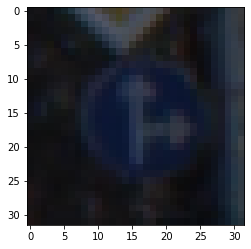

In [9]:
i = 1000
plt.imshow(X_train[i]) # Show images are not shuffled
y_train[i]

4

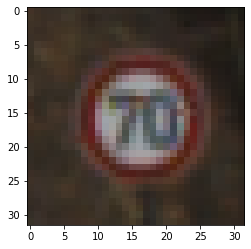

In [11]:
i = 1000
plt.imshow(X_validation[i])
y_validation[i]

# STEP-3: DATA PREPARATION

In [13]:
#Shuffle the dataset
from sklearn.utils import shuffle
X_train,y_train = shuffle(X_train,y_train)


In [14]:
X_train_gray = np.sum(X_train/3,axis = 3,keepdims= True)
X_validation_gray = np.sum(X_validation/3,axis = 3,keepdims= True)
X_test_gray = np.sum(X_test/3,axis = 3,keepdims= True)

In [15]:
X_train_gray.shape

(34799, 32, 32, 1)

In [16]:
X_validation_gray.shape

(4410, 32, 32, 1)

In [17]:
X_test_gray.shape

(12630, 32, 32, 1)

In [18]:
X_train_gray_norm = (X_train_gray - 128)/128
X_test_gray_norm = (X_test_gray - 128)/128
X_validation_gray_norm = (X_validation_gray - 128)/128

In [19]:
X_train_gray_norm

array([[[[ 0.1796875 ],
         [ 0.11458333],
         [ 0.04427083],
         ...,
         [-0.70052083],
         [-0.625     ],
         [-0.65885417]],

        [[ 0.08072917],
         [-0.01822917],
         [-0.01822917],
         ...,
         [-0.67708333],
         [-0.58854167],
         [-0.58854167]],

        [[ 0.15625   ],
         [ 0.02083333],
         [-0.04166667],
         ...,
         [-0.66927083],
         [-0.65625   ],
         [-0.59114583]],

        ...,

        [[-0.0546875 ],
         [-0.03385417],
         [-0.0234375 ],
         ...,
         [-0.72135417],
         [-0.76041667],
         [-0.70833333]],

        [[-0.04166667],
         [-0.0546875 ],
         [-0.16145833],
         ...,
         [-0.70052083],
         [-0.76302083],
         [-0.66927083]],

        [[-0.04947917],
         [-0.16666667],
         [-0.27604167],
         ...,
         [-0.77604167],
         [-0.78385417],
         [-0.67447917]]],


       [[[-0.34114583],


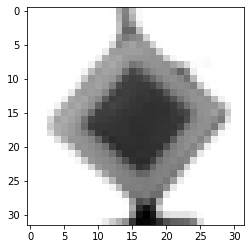

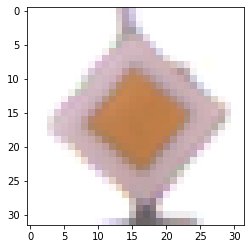

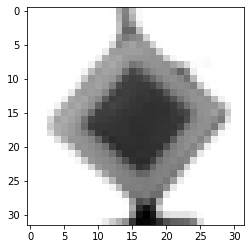

In [20]:
i = 610
plt.imshow(X_train_gray[i].squeeze(),cmap = 'gray')
plt.figure()
plt.imshow(X_train[i])
plt.figure()
plt.imshow(X_train_gray_norm[i].squeeze(),cmap='gray')

# STEP-4: MODEL TRAINING

The model consists of the following layers: 

- STEP 1: THE FIRST CONVOLUTIONAL LAYER #1
    - Input = 32x32x1
    - Output = 28x28x6
    - Output = (Input-filter+1)/Stride* => (32-5+1)/1=28
    - Used a 5x5 Filter with input depth of 3 and output depth of 6
    - Apply a RELU Activation function to the output
    - pooling for input, Input = 28x28x6 and Output = 14x14x6


    * Stride is the amount by which the kernel is shifted when the kernel is passed over the image.

- STEP 2: THE SECOND CONVOLUTIONAL LAYER #2
    - Input = 14x14x6
    - Output = 10x10x16
    - Layer 2: Convolutional layer with Output = 10x10x16
    - Output = (Input-filter+1)/strides => 10 = 14-5+1/1
    - Apply a RELU Activation function to the output
    - Pooling with Input = 10x10x16 and Output = 5x5x16

- STEP 3: FLATTENING THE NETWORK
    - Flatten the network with Input = 5x5x16 and Output = 400

- STEP 4: FULLY CONNECTED LAYER
    - Layer 3: Fully Connected layer with Input = 400 and Output = 120
    - Apply a RELU Activation function to the output

- STEP 5: ANOTHER FULLY CONNECTED LAYER
    - Layer 4: Fully Connected Layer with Input = 120 and Output = 84
    - Apply a RELU Activation function to the output

- STEP 6: FULLY CONNECTED LAYER
    - Layer 5: Fully Connected layer with Input = 84 and Output = 43

In [21]:
# Import train_test_split from scikit library

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, AveragePooling2D, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

from sklearn.model_selection import train_test_split

In [22]:
image_shape = X_train_gray[i].shape

In [23]:
cnn_model = Sequential()
cnn_model.add(Conv2D(filters = 6,kernel_size=(5,5),activation='relu',input_shape=(32,32,1)))
cnn_model.add(AveragePooling2D())

cnn_model.add(Conv2D(filters = 16,kernel_size=(5,5),activation='relu'))
cnn_model.add(AveragePooling2D())

cnn_model.add(Flatten())

cnn_model.add(Dense(units=120, activation='relu'))

cnn_model.add(Dense(units=84, activation='relu'))

cnn_model.add(Dense(units=43, activation='softmax'))

In [24]:
cnn_model.compile(loss='sparse_categorical_crossentropy',optimizer=Adam(lr=0.01),metrics=['accuracy'])

In [25]:
history = cnn_model.fit(X_train_gray_norm,
             y_train,
             batch_size=500,
             epochs = 10,
             verbose=1,
             validation_data = (X_validation_gray_norm,y_validation))

Epoch 1/10



70/70 [==============================] - 4s 38ms/step - loss: 3.1951 - accuracy: 0.1793 - val_loss: 2.7436 - val_accuracy: 0.2873
Epoch 2/10
70/70 [==============================] - 2s 32ms/step - loss: 1.6174 - accuracy: 0.5588 - val_loss: 1.2322 - val_accuracy: 0.6531
Epoch 3/10
70/70 [==============================] - 2s 32ms/step - loss: 0.8213 - accuracy: 0.7726 - val_loss: 0.8957 - val_accuracy: 0.7476
Epoch 4/10
70/70 [==============================] - 2s 34ms/step - loss: 0.5798 - accuracy: 0.8431 - val_loss: 0.7632 - val_accuracy: 0.7782
Epoch 5/10
70/70 [==============================] - 2s 33ms/step - loss: 0.4587 - accuracy: 0.8803 - val_loss: 0.7078 - val_accuracy: 0.8005
Epoch 6/10
70/70 [==============================] - 2s 33ms/step - loss: 0.3766 - accuracy: 0.9039 - val_loss: 0.6132 - val_accuracy: 0.8342
Epoch 7/10
70/70 [==============================] - 2s 32ms/step - loss: 0.3239 - accuracy: 0.9180 - val_loss: 0.5969 - val_accuracy: 0.8338
Epoch 8/10
70/70 [======

# STEP-5: MODEL EVALUATION

In [26]:
score = cnn_model.evaluate(X_test_gray_norm,y_test,verbose=0)
print('Test Accuracy:{}'.format(score[1]))

Test Accuracy:0.8332541584968567


In [27]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [28]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

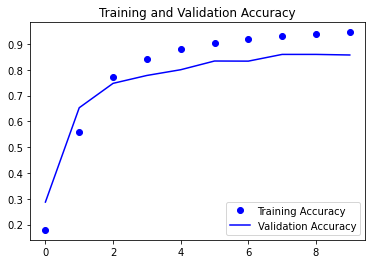

In [29]:
epochs = range(len(accuracy))

plt.plot(epochs,accuracy,'bo',label='Training Accuracy')
plt.plot(epochs,val_accuracy,'b',label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

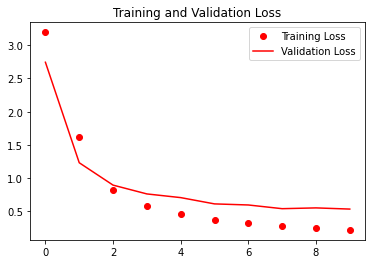

In [30]:
plt.plot(epochs,loss,'ro',label='Training Loss')
plt.plot(epochs,val_loss,'r',label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

In [41]:
y_pred_probabilities = cnn_model.predict(X_test_gray_norm)

# Get the predicted classes using argmax
predicted_classes = np.argmax(y_pred_probabilities, axis=1)

# Now you can compare predicted_classes with y_true or use them as needed
y_true = y_test

395/395 [==============================] - 1s 3ms/step


<AxesSubplot:>

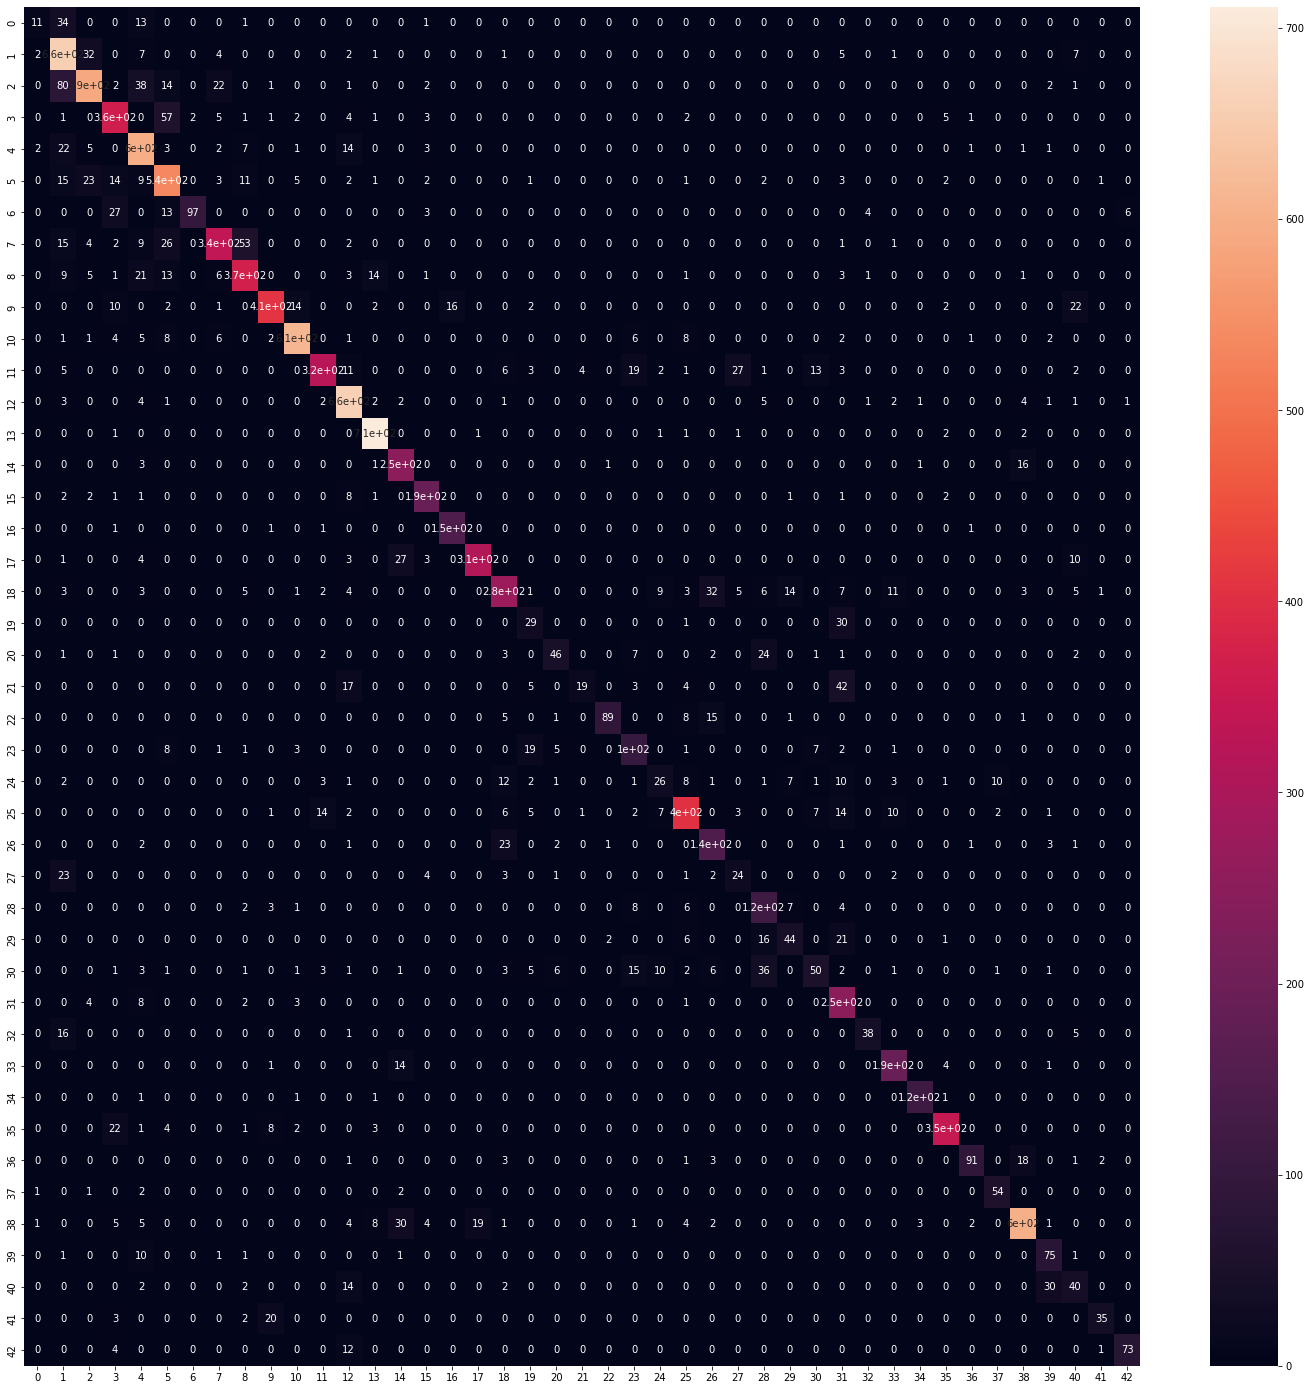

In [43]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true,predicted_classes)
plt.figure(figsize=(25,25))
sns.heatmap(cm,annot=True)

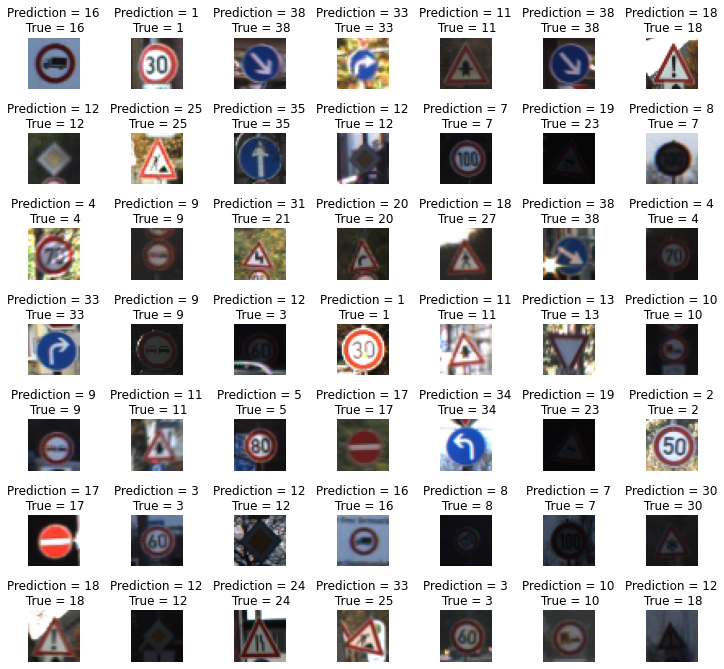

In [47]:
L =7
W = 7

fig,axes=plt.subplots(L,W,figsize=(12,12))
axes= axes.ravel()

for i in np.arange(0,L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i],y_true[i]))
    axes[i].axis('off')
    
plt.subplots_adjust(wspace = 1)